Ricky's Working Notebook

In [115]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

In [116]:
con = sqlite3.connect('Data/im.db')

In [117]:
pd.read_sql('''

SELECT *
FROM sqlite_master

''', con)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [118]:
#Gotta check on my little brother
pd.read_sql('''

SELECT *
FROM principals
    JOIN persons
        USING(person_id)
    JOIN movie_basics
        USING(movie_id)
WHERE primary_name = 'Nick Robinson'

''', con)

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0835802,2,nm3538718,actor,None,"[""Taylor Ogburn""]",Nick Robinson,1995.0,None,"actor,soundtrack",Krystal,Krystal,2017,90.0,"Comedy,Drama"
1,tt2179116,1,nm3538718,actor,None,"[""Joe""]",Nick Robinson,1995.0,None,"actor,soundtrack",The Kings of Summer,The Kings of Summer,2013,95.0,"Adventure,Comedy,Drama"
2,tt2866708,4,nm3538718,actor,None,"[""Philip""]",Nick Robinson,1995.0,None,"actor,soundtrack",Strange But True,Strange But True,2019,NaN,Thriller
3,tt4353270,2,nm3538718,actor,None,"[""Lance Zutterland""]",Nick Robinson,1995.0,None,"actor,soundtrack",Echo Boomers,Echo Boomers,2019,NaN,"Action,Crime,Drama"
4,tt4630444,1,nm3538718,actor,None,"[""Charlie Mills""]",Nick Robinson,1995.0,None,"actor,soundtrack",Being Charlie,Being Charlie,2015,97.0,"Drama,Romance"
5,tt5001718,2,nm3538718,actor,None,"[""Olly""]",Nick Robinson,1995.0,None,"actor,soundtrack","Everything, Everything","Everything, Everything",2017,96.0,"Drama,Romance"
6,tt5164432,1,nm3538718,actor,None,"[""Simon""]",Nick Robinson,1995.0,None,"actor,soundtrack","Love, Simon","Love, Simon",2018,110.0,"Comedy,Drama,Romance"
7,tt6566768,3,nm3538718,actor,None,"[""Jan""]",Nick Robinson,1995.0,None,"actor,soundtrack",Native Son,Native Son,2019,104.0,Drama


In [119]:
pd.read_sql('''

SELECT *
FROM movie_basics
LIMIT 15
        
''', con)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [120]:
#reading in financial data csv
tn_data = pd.read_csv('Data/tn.movie_budgets.csv')
bom_data = pd.read_csv('Data/bom.movie_gross.csv')
kaggle_data = pd.read_csv('Data/movie_statistic_dataset.csv')
inflation_data  = pd.read_csv('Data/US_CPI.csv')

In [121]:

tn_data['production_budget'] = tn_data['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
tn_data['domestic_gross'] = tn_data['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
tn_data['worldwide_gross'] = tn_data['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)


In [122]:
tn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [123]:
tn_data = tn_data[tn_data['production_budget'] != 0]

In [124]:
tn_and_bom = tn_data.merge(bom_data, left_on='movie', right_on='title', how='left')

In [125]:
#tn_and_bom[(tn_and_bom['domestic_gross_x']==0) & (tn_and_bom['domestic_gross_y'].notnull)]
tn_and_bom = tn_and_bom[(tn_and_bom['domestic_gross_x'] != 0) | (tn_and_bom['domestic_gross_y'].notnull())]

In [126]:
#Now we learned that the bom data set only has info for 8 movies not in the tn data set so we can stop looking. 
tn_and_bom[tn_and_bom['domestic_gross_x']==0 & (tn_and_bom['domestic_gross_y'].notnull())]

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
2850,51,"Nov 14, 2014",Wolves,18000000.0,0.0,94953.0,Wolves,KE,12100.0,NaN,2014.0
3153,54,"Dec 6, 2013",Khumba,15000000.0,0.0,20898221.0,Khumba,MNE,1000.0,27200000,2013.0
4463,64,"Jun 6, 2014",Anna,4357373.0,0.0,1200000.0,Anna,VE,4300.0,NaN,2014.0
4768,69,"Sep 18, 1967",Point Blank,3000000.0,0.0,0.0,Point Blank,Magn.,708000.0,8500000,2011.0
4865,66,"Jan 19, 2016",Eden,2300000.0,0.0,0.0,Eden,BG,65500.0,NaN,2015.0
5330,31,"Dec 31, 2012",Trance,950000.0,0.0,0.0,Trance,FoxS,2300000.0,21900000,2013.0
5351,52,"Dec 31, 2012",Snitch,850000.0,0.0,0.0,Snitch,LG/S,42900000.0,NaN,2013.0
5415,16,"Mar 4, 2016",They Will Have to Kill Us First,600000.0,0.0,7943.0,They Will Have to Kill Us First,BBC,7500.0,NaN,2016.0


In [127]:
tn_data = tn_data[tn_data['domestic_gross'] != 0]

In [128]:
tn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5234 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5234 non-null   int64  
 1   release_date       5234 non-null   object 
 2   movie              5234 non-null   object 
 3   production_budget  5234 non-null   float64
 4   domestic_gross     5234 non-null   float64
 5   worldwide_gross    5234 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 286.2+ KB


In [129]:
money_data = kaggle_data.merge(tn_data, left_on='movie_title', right_on='movie', how='outer')

In [130]:
money_data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000.0,667830256.0,2.265936e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000.0,858373000.0,2.794732e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000.0,241071802.0,1.045714e+09,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000.0,459005868.0,1.395317e+09,4.0,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000.0,678815482.0,2.048360e+09,7.0,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09


In [131]:
money_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4527 non-null   object 
 1   production_date       4527 non-null   object 
 2   genres                4527 non-null   object 
 3   runtime_minutes       4527 non-null   float64
 4   director_name         4527 non-null   object 
 5   director_professions  4527 non-null   object 
 6   director_birthYear    4527 non-null   object 
 7   director_deathYear    4527 non-null   object 
 8   movie_averageRating   4527 non-null   float64
 9   movie_numerOfVotes    4527 non-null   float64
 10  approval_Index        4527 non-null   float64
 11  Production budget $   4527 non-null   float64
 12  Domestic gross $      4527 non-null   float64
 13  Worldwide gross $     4527 non-null   float64
 14  id                    5434 non-null   float64
 15  release_date         

In [132]:
money_data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000.0,667830256.0,2.265936e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000.0,858373000.0,2.794732e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000.0,241071802.0,1.045714e+09,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000.0,459005868.0,1.395317e+09,4.0,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000.0,678815482.0,2.048360e+09,7.0,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09


In [133]:
money_data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000.0,667830256.0,2.265936e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000.0,858373000.0,2.794732e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000.0,241071802.0,1.045714e+09,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000.0,459005868.0,1.395317e+09,4.0,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000.0,678815482.0,2.048360e+09,7.0,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09


In [134]:
#With these 2 datasets, when we have the Kaggle data we want to keep that but we want to fill in with TN data for films we don't have in our Kaggle dataset.

In [135]:

money_data['Production budget $'].fillna(money_data['production_budget'], inplace=True)
money_data['Domestic gross $'].fillna(money_data['domestic_gross'], inplace=True)
money_data['Worldwide gross $'].fillna(money_data['worldwide_gross'], inplace=True)
money_data['movie_title'].fillna(money_data['movie'], inplace=True)
money_data['production_date'] = pd.to_datetime(money_data['production_date'], errors='coerce')#get dates into dt format
money_data['release_date'] = pd.to_datetime(money_data['release_date'], errors='coerce')#get dates into dt format
money_data['production_date'].fillna(money_data['release_date'], inplace=True)
money_data['year'] = money_data['production_date'].dt.year
print(money_data.head())

                                   movie_title production_date  \
0                     Avatar: The Way of Water      2022-12-09   
1                            Avengers: Endgame      2019-04-23   
2  Pirates of the Caribbean: On Stranger Tides      2011-05-20   
3                      Avengers: Age of Ultron      2015-04-22   
4                       Avengers: Infinity War      2018-04-25   

                     genres  runtime_minutes  director_name  \
0  Action,Adventure,Fantasy            192.0  James Cameron   
1    Action,Adventure,Drama            181.0              -   
2  Action,Adventure,Fantasy            137.0   Rob Marshall   
3   Action,Adventure,Sci-Fi            141.0    Joss Whedon   
4   Action,Adventure,Sci-Fi            149.0              -   

              director_professions director_birthYear director_deathYear  \
0         writer,producer,director               1954              alive   
1                                -                  -                  -

In [136]:
print(money_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movie_title           5758 non-null   object        
 1   production_date       4652 non-null   datetime64[ns]
 2   genres                4527 non-null   object        
 3   runtime_minutes       4527 non-null   float64       
 4   director_name         4527 non-null   object        
 5   director_professions  4527 non-null   object        
 6   director_birthYear    4527 non-null   object        
 7   director_deathYear    4527 non-null   object        
 8   movie_averageRating   4527 non-null   float64       
 9   movie_numerOfVotes    4527 non-null   float64       
 10  approval_Index        4527 non-null   float64       
 11  Production budget $   5758 non-null   float64       
 12  Domestic gross $      5758 non-null   float64       
 13  Worldwide gross $ 

In [137]:
#next step: derived columns - costs and gross adjusted to year
inflation_data.head()


,Yearmon,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8
2,01-03-1913,9.8
3,01-04-1913,9.8
4,01-05-1913,9.7


In [138]:
print(money_data[money_data['production_date'].isna()])

                                       movie_title production_date genres  \
4527                                  Dark Phoenix             NaT    NaN   
4528             Star Wars Ep. VIII: The Last Jedi             NaT    NaN   
4529          Star Wars Ep. VII: The Force Awakens             NaT    NaN   
4531  Pirates of the Caribbean: Dead Manâs Chest             NaT    NaN   
4534                  Disneyâs A Christmas Carol             NaT    NaN   
...                                            ...             ...    ...   
5752                                        Primer             NaT    NaN   
5754                               The Mongol King             NaT    NaN   
5755                                     Following             NaT    NaN   
5756                 Return to the Land of Wonders             NaT    NaN   
5757                             My Date With Drew             NaT    NaN   

      runtime_minutes director_name director_professions director_birthYear

In [139]:
#Now to get our CPI data to just years. We'll take December each year just for consistency. 
inflation_data['Yearmon'] = pd.to_datetime(inflation_data['Yearmon'], errors='coerce')
CPI_by_year = inflation_data[inflation_data['Yearmon'].dt.day == 12] #datetime got confused and thought 12 days in january per year rather than 1st day of 12 months.

In [140]:
CPI_by_year['Year']=CPI_by_year['Yearmon'].dt.year

CPI_by_year.head()

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_64936\953924654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPI_by_year['Year']=CPI_by_year['Yearmon'].dt.year


,Yearmon,CPI,Year
11,1913-01-12,10.0,1913
23,1914-01-12,10.1,1914
35,1915-01-12,10.3,1915
47,1916-01-12,11.6,1916
59,1917-01-12,13.7,1917


In [141]:
# Base year for inflation adjustment (choose the latest year in your dataset)
base_year = CPI_by_year['Year'].max()
base_cpi = CPI_by_year[CPI_by_year['Year'] == base_year]['CPI'].values[0]

# Merge inflation data with movie data
money_data = pd.merge(money_data, CPI_by_year, how='left', left_on='year', right_on='Year')

# Adjust values
money_data['adjusted_production_budget'] = (money_data['Production budget $'] * base_cpi) / money_data['CPI']
money_data['adjusted_domestic_gross'] = (money_data['Domestic gross $'] * base_cpi) / money_data['CPI']
money_data['adjusted_worldwide_gross'] = (money_data['Worldwide gross $'] * base_cpi) / money_data['CPI']

# Drop unnecessary columns from the merge
money_data.drop(columns=['Year', 'CPI'], inplace=True)

# Preview adjusted data
print(money_data[['movie_title', 'year', 'adjusted_production_budget', 'adjusted_domestic_gross', 'adjusted_worldwide_gross']].head())


                                   movie_title    year  \
0                     Avatar: The Way of Water  2022.0   
1                            Avengers: Endgame  2019.0   
2  Pirates of the Caribbean: On Stranger Tides  2011.0   
3                      Avengers: Age of Ultron  2015.0   
4                       Avengers: Infinity War  2018.0   

   adjusted_production_budget  adjusted_domestic_gross  \
0                         NaN                      NaN   
1                4.054480e+08             8.700641e+08   
2                4.374475e+08             2.782487e+08   
3                4.019576e+08             5.054818e+08   
4                3.110348e+08             7.037841e+08   

   adjusted_worldwide_gross  
0                       NaN  
1              2.832796e+09  
2              1.206979e+09  
3              1.536598e+09  
4              2.123704e+09  


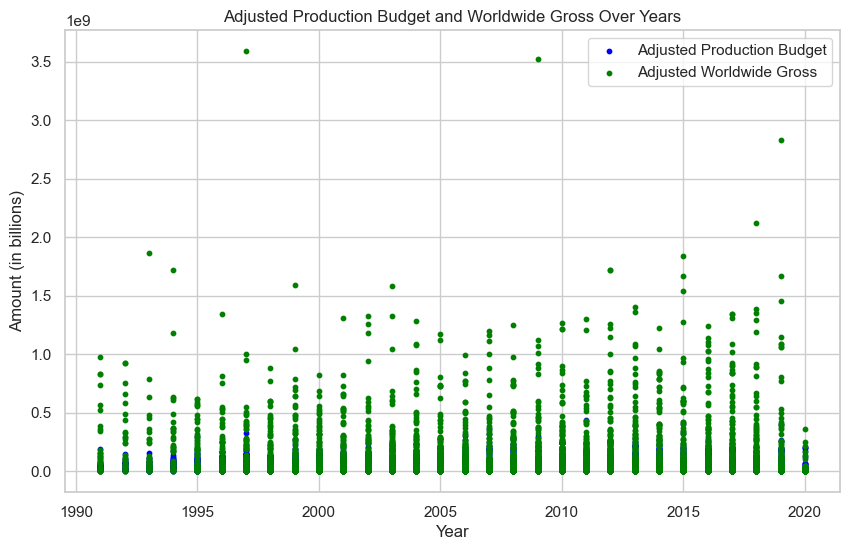

In [142]:
# Comparison of annual adjusted production budget and worldwide revenues
filtered_data = money_data[money_data['year'] > 1990]

# Scatter plot için marker boyutunu küçültme
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['year'], filtered_data['adjusted_production_budget'], label='Adjusted Production Budget', color='blue', s=10)  # 's' parametresi boyut
plt.scatter(filtered_data['year'], filtered_data['adjusted_worldwide_gross'], label='Adjusted Worldwide Gross', color='green', s=10)
plt.xlabel('Year')
plt.ylabel('Amount (in billions)')
plt.title('Adjusted Production Budget and Worldwide Gross Over Years')
plt.legend()
plt.grid(True)
plt.show()

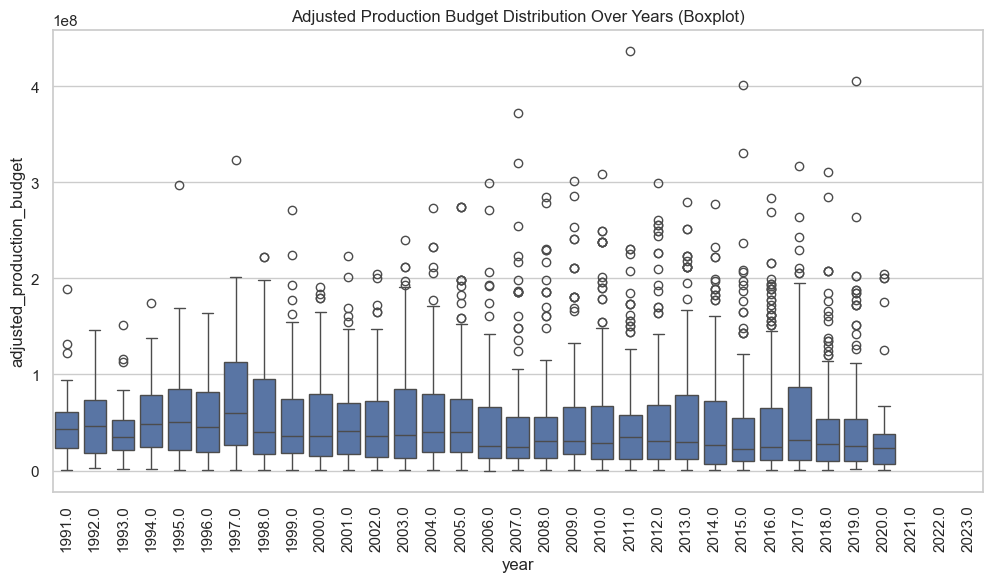

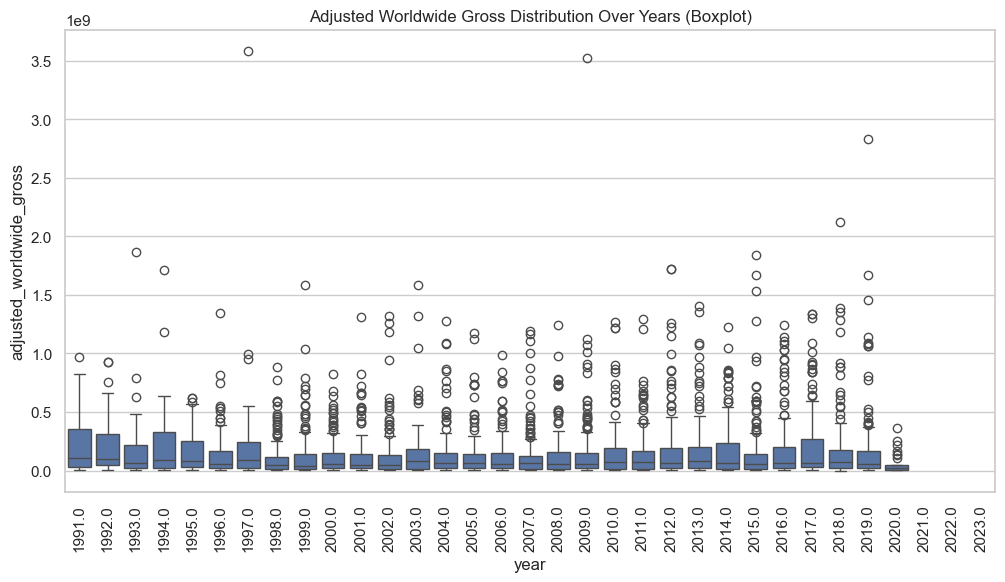

In [143]:
# Distribution by years with boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='adjusted_production_budget', data=filtered_data)
plt.xticks(rotation=90)  # X eksenindeki yılları net görmek için döndürme
plt.title('Adjusted Production Budget Distribution Over Years (Boxplot)')
plt.show()

# Likewise for Worldwide Gross
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='adjusted_worldwide_gross', data=filtered_data)
plt.xticks(rotation=90)
plt.title('Adjusted Worldwide Gross Distribution Over Years (Boxplot)')
plt.show()

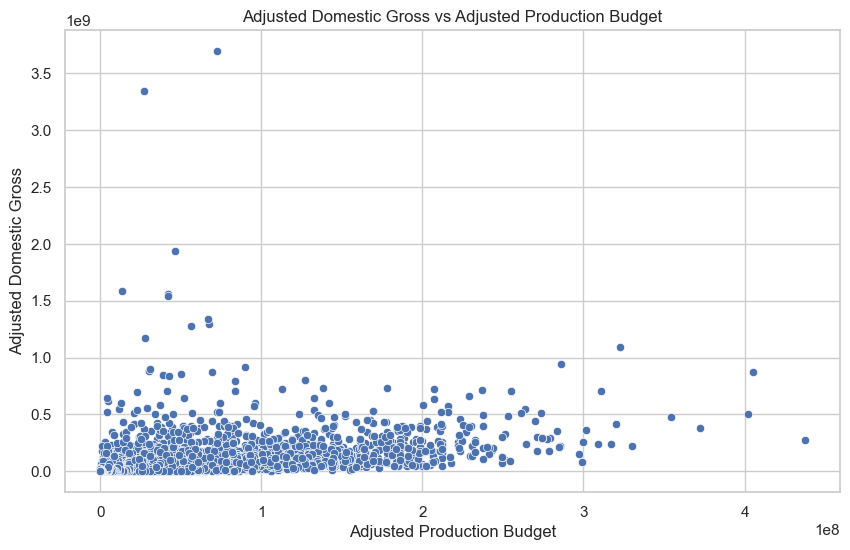

In [144]:
#Domestic Revenue and Production Budget Adjusted with Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=money_data['adjusted_production_budget'], y=money_data['adjusted_domestic_gross'])

plt.xlabel('Adjusted Production Budget')
plt.ylabel('Adjusted Domestic Gross')
plt.title('Adjusted Domestic Gross vs Adjusted Production Budget')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

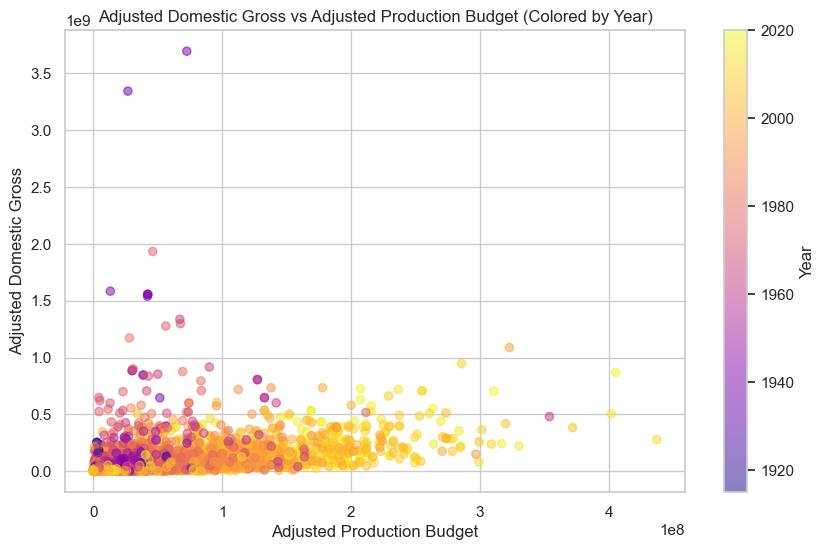

In [145]:
# Scatter plot with production budget and local revenue relationship (colored and clearer)
plt.figure(figsize=(10, 6))

# Adjusting colormap using 'plasma' colormap
plt.figure(figsize=(10, 6))
sc = plt.scatter(money_data['adjusted_production_budget'], 
                 money_data['adjusted_domestic_gross'], 
                 c=money_data['year'], cmap='plasma', alpha=0.5) 
plt.colorbar(sc, label='Year')
plt.xlabel('Adjusted Production Budget')
plt.ylabel('Adjusted Domestic Gross')
plt.title('Adjusted Domestic Gross vs Adjusted Production Budget (Colored by Year)')
plt.grid(True)
plt.show()


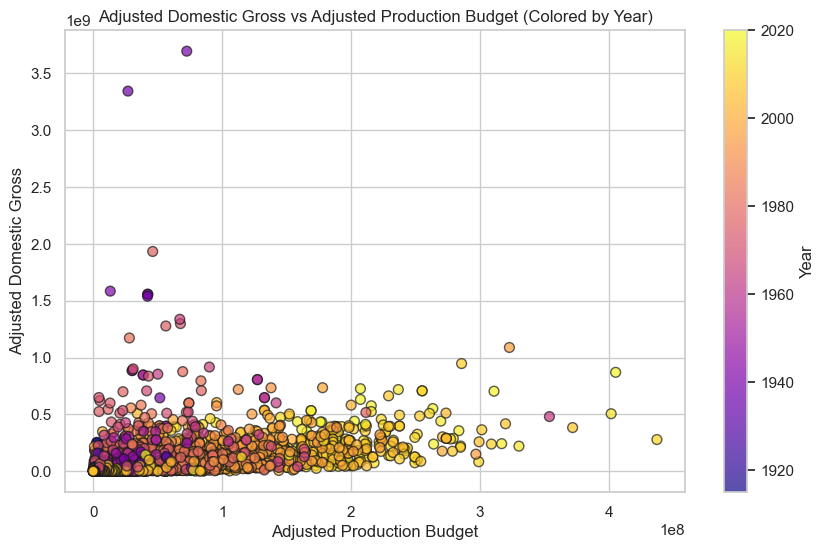

In [146]:
# Set plot style
sns.set(style="whitegrid")

# Scatter plot for Adjusted Domestic Gross vs Adjusted Production Budget
plt.figure(figsize=(10, 6))

# Define the scatter plot with better visual parameters
scatter = plt.scatter(money_data['adjusted_production_budget'],
                      money_data['adjusted_domestic_gross'],
                      c=money_data['year'], cmap='plasma', s=50, alpha=0.7, edgecolor='k')

# Add a color bar to indicate the years
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Set titles and labels
plt.title('Adjusted Domestic Gross vs Adjusted Production Budget (Colored by Year)')
plt.xlabel('Adjusted Production Budget')
plt.ylabel('Adjusted Domestic Gross')

# Display the plot
plt.show()

In [147]:
# Step 1: Calculate Adjusted ROI
money_data['adjusted_ROI'] = (money_data['adjusted_worldwide_gross'] - money_data['adjusted_production_budget']) / money_data['adjusted_production_budget']


In [148]:
conn = sqlite3.connect('Data/im.db')

In [149]:
imdb_data = pd.read_sql('SELECT * FROM movie_basics', conn)
conn.close()

In [150]:
print(imdb_data.head())

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [151]:
print(imdb_data.columns)

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')


In [152]:
imdb_data['movie_title'] = imdb_data['primary_title'].str.strip()

# Merge the datasets using movie_title
combined_data = pd.merge(imdb_data, money_data, on='movie_title')

# Preview the merged dataset
print(combined_data.head())

    movie_id  primary_title original_title  start_year  runtime_minutes_x  \
0  tt0293429  Mortal Kombat  Mortal Kombat        2021                NaN   
1  tt0293429  Mortal Kombat  Mortal Kombat        2021                NaN   
2  tt0326592  The Overnight  The Overnight        2010               88.0   
3  tt3844362  The Overnight  The Overnight        2015               79.0   
4  tt0337692    On the Road    On the Road        2012              124.0   

                   genres_x    movie_title production_date  \
0  Action,Adventure,Fantasy  Mortal Kombat      2021-04-08   
1  Action,Adventure,Fantasy  Mortal Kombat      1995-08-18   
2                      None  The Overnight      2015-06-19   
3            Comedy,Mystery  The Overnight      2015-06-19   
4   Adventure,Drama,Romance    On the Road      2012-05-23   

                   genres_y  runtime_minutes_y  ...          movie  \
0  Action,Adventure,Fantasy              110.0  ...  Mortal Kombat   
1  Action,Adventure,Fant

In [153]:
# Drop unnecessary or duplicate columns
combined_data_cleaned = combined_data.drop(columns=['runtime_minutes_x', 'movie', 'production_date', 'genres_y'])

# Preview the cleaned dataset
print(combined_data_cleaned.head())

    movie_id  primary_title original_title  start_year  \
0  tt0293429  Mortal Kombat  Mortal Kombat        2021   
1  tt0293429  Mortal Kombat  Mortal Kombat        2021   
2  tt0326592  The Overnight  The Overnight        2010   
3  tt3844362  The Overnight  The Overnight        2015   
4  tt0337692    On the Road    On the Road        2012   

                   genres_x    movie_title  runtime_minutes_y  \
0  Action,Adventure,Fantasy  Mortal Kombat              110.0   
1  Action,Adventure,Fantasy  Mortal Kombat              101.0   
2                      None  The Overnight               79.0   
3            Comedy,Mystery  The Overnight               79.0   
4   Adventure,Drama,Romance    On the Road              124.0   

        director_name      director_professions director_birthYear  ...  \
0       Simon McQuoid         director,producer                 \N  ...   
1  Paul W.S. Anderson  writer,director,producer               1965  ...   
2       Patrick Brice     director,

In [154]:
combined_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   movie_id                    4182 non-null   object        
 1   primary_title               4182 non-null   object        
 2   original_title              4181 non-null   object        
 3   start_year                  4182 non-null   int64         
 4   genres_x                    4109 non-null   object        
 5   movie_title                 4182 non-null   object        
 6   runtime_minutes_y           3771 non-null   float64       
 7   director_name               3771 non-null   object        
 8   director_professions        3771 non-null   object        
 9   director_birthYear          3771 non-null   object        
 10  director_deathYear          3771 non-null   object        
 11  movie_averageRating         3771 non-null   float64     

In [155]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   movie_title      146144 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.8+ MB


In [156]:
df_clean_movies = combined_data_cleaned[['movie_id','movie_title','genres_x','year','director_name','director_birthYear','director_deathYear',
                                            'adjusted_production_budget','adjusted_domestic_gross','adjusted_worldwide_gross','adjusted_ROI',
                                            'movie_averageRating','movie_numerOfVotes','approval_Index']]
df_clean_movies.head()

,movie_id,movie_title,genres_x,year,director_name,director_birthYear,director_deathYear,adjusted_production_budget,adjusted_domestic_gross,adjusted_worldwide_gross,adjusted_ROI,movie_averageRating,movie_numerOfVotes,approval_Index
0,tt0293429,Mortal Kombat,"Action,Adventure,Fantasy",2021.0,Simon McQuoid,\N,alive,NaN,NaN,NaN,NaN,6.0,176605.0,5.201632
1,tt0293429,Mortal Kombat,"Action,Adventure,Fantasy",1995.0,Paul W.S. Anderson,1965,alive,3.393798e+07,1.195181e+08,2.072478e+08,5.106661,5.8,119670.0,4.857774
2,tt0326592,The Overnight,None,2015.0,Patrick Brice,1983,alive,2.202507e+05,1.222180e+06,1.284057e+06,4.829980,6.1,17175.0,4.244593
3,tt3844362,The Overnight,"Comedy,Mystery",2015.0,Patrick Brice,1983,alive,2.202507e+05,1.222180e+06,1.284057e+06,4.829980,6.1,17175.0,4.244593
4,tt0337692,On the Road,"Adventure,Drama,Romance",2012.0,Walter Salles,1956,alive,2.836159e+07,8.177532e+05,1.056560e+07,-0.627468,6.0,42341.0,4.571170


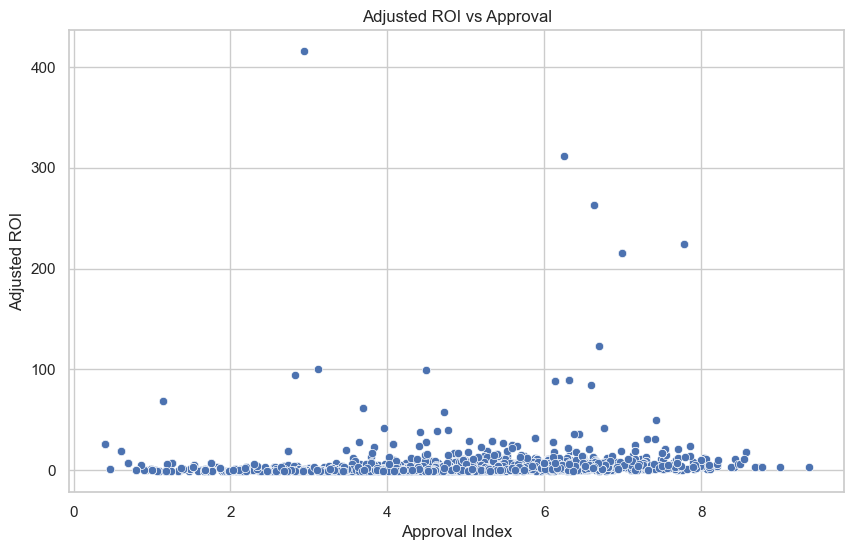

In [157]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y=df_clean_movies['adjusted_ROI'], x=df_clean_movies['approval_Index'])

plt.ylabel('Adjusted ROI')
plt.xlabel('Approval Index')
plt.title('Adjusted ROI vs Approval')
plt.grid(True)
plt.show()

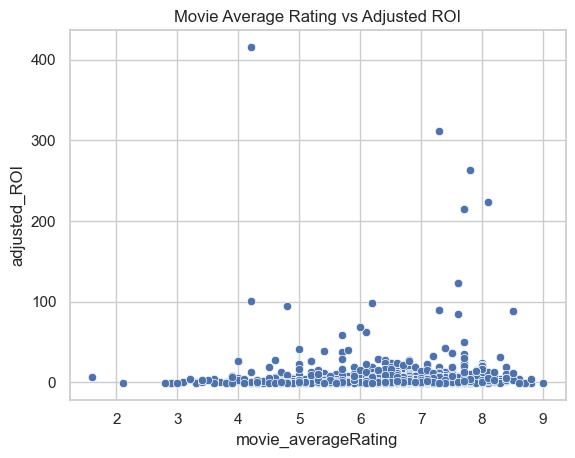

In [158]:
sns.scatterplot(data=df_clean_movies, x='movie_averageRating', y='adjusted_ROI')
plt.title('Movie Average Rating vs Adjusted ROI')
plt.show()


In [159]:
df_clean_movies['director_birthYear'] = pd.to_numeric(df_clean_movies['director_birthYear'], errors='coerce')
available_directors = df_clean_movies[
    (df_clean_movies['director_birthYear'] > 1952) & 
    (df_clean_movies['director_deathYear']=='alive')
]
director_roi = available_directors.groupby('director_name')['adjusted_ROI'].mean().sort_values(ascending=False).reset_index()


print(director_roi.head())

       director_name  adjusted_ROI
0       Tod Williams     58.170677
1      Nitesh Tiwari     31.120996
2      Barry Jenkins     28.451563
3     William Lustig     27.571429
4  David F. Sandberg     23.777532


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_64936\1371936000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_movies['director_birthYear'] = pd.to_numeric(df_clean_movies['director_birthYear'], errors='coerce')


In [160]:
print(director_roi.head(50))

         director_name  adjusted_ROI
0         Tod Williams     58.170677
1        Nitesh Tiwari     31.120996
2        Barry Jenkins     28.451563
3       William Lustig     27.571429
4    David F. Sandberg     23.777532
5         Jordan Peele     21.215722
6       Stephen Daldry     20.850594
7          Jeff Wadlow     20.568114
8     John R. Leonetti     19.736494
9       Michael Madsen     18.735563
10      John Krasinski     18.698628
11       Chuck Russell     18.534452
12        Daniel Stamm     18.496472
13     Takashi Shimizu     17.728111
14      James DeMonaco     17.222144
15        Adam Robitel     16.288277
16       Alex Kendrick     15.708095
17         Corin Hardy     15.517802
18    Scott Derrickson     15.379035
19        Steve Barron     13.962963
20       Drake Doremus     13.913600
21  Sam Taylor-Johnson     13.269874
22      Leigh Whannell     13.178853
23        David Lowery     12.956411
24      Peter Farrelly     12.912827
25      Justin Baldoni     12.222030
2

In [161]:
available_directors['genres_x'].fillna('Unknown', inplace=True)

director_stats = available_directors.groupby('director_name').agg({
    'genres_x': lambda x: ', '.join(set(x)),  # Get unique genres and join them as a string
    'adjusted_production_budget': 'mean'  # Calculate the average adjusted production budget
}).reset_index()
director_full_stats = pd.merge(director_roi, director_stats, on='director_name')

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_64936\3379184613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  available_directors['genres_x'].fillna('Unknown', inplace=True)


In [162]:
director_full_stats.head(30)

,director_name,adjusted_ROI,genres_x,adjusted_production_budget
0,Tod Williams,58.170677,Horror,3.565223e+06
1,Nitesh Tiwari,31.120996,"Action,Biography,Drama, Action",1.024928e+07
2,Barry Jenkins,28.451563,"Drama,Romance, Drama, Horror",5.226001e+06
3,William Lustig,27.571429,"Horror,Thriller, Action,Horror,Thriller",1.056384e+06
4,David F. Sandberg,23.777532,"Drama,Horror,Mystery, Drama, Documentary, Horr...",1.842547e+07
5,Jordan Peele,21.215722,"Comedy, Drama, Horror,Mystery,Thriller",1.652503e+07
6,Stephen Daldry,20.850594,"Comedy,Drama,Music",7.484885e+06
7,Jeff Wadlow,20.568114,"Adventure,Comedy,Fantasy, Action,Comedy,Crime,...",7.508431e+06
8,John R. Leonetti,19.736494,"Drama,Fantasy,Horror, Horror,Mystery,Thriller",9.944705e+06
9,Michael Madsen,18.735563,"Documentary,Drama, Comedy,Drama,Romance, Thril...",5.506268e+06


In [180]:
director_full_stats['budget_category'] = pd.cut(director_full_stats['adjusted_production_budget'], 
                                                bins=[0, 5e6, 2e7, np.inf], 
                                                labels=['Low Budget', 'Medium Budget', 'High Budget'])
budget_analysis = director_full_stats.groupby('budget_category')['adjusted_ROI'].mean().reset_index()
print(budget_analysis)

  budget_category  adjusted_ROI
0      Low Budget      3.390111
1   Medium Budget      3.336897
2     High Budget      2.005629


In [181]:
movie_counts = available_directors.groupby('director_name').size().reset_index(name='movie_count')

director_full_stats = pd.merge(director_full_stats, movie_counts, on='director_name')

In [182]:
df_cleaned_exploded = df_clean_movies.copy()
df_cleaned_exploded['genres_x'] = df_cleaned_exploded['genres_x'].str.split(',')
df_cleaned_exploded = df_cleaned_exploded.explode('genres_x')

df_cleaned_exploded

,movie_id,movie_title,genres_x,year,director_name,director_birthYear,director_deathYear,adjusted_production_budget,adjusted_domestic_gross,adjusted_worldwide_gross,adjusted_ROI,movie_averageRating,movie_numerOfVotes,approval_Index
0,tt0293429,Mortal Kombat,Action,2021.0,Simon McQuoid,NaN,alive,NaN,NaN,NaN,NaN,6.0,176605.0,5.201632
0,tt0293429,Mortal Kombat,Adventure,2021.0,Simon McQuoid,NaN,alive,NaN,NaN,NaN,NaN,6.0,176605.0,5.201632
0,tt0293429,Mortal Kombat,Fantasy,2021.0,Simon McQuoid,NaN,alive,NaN,NaN,NaN,NaN,6.0,176605.0,5.201632
1,tt0293429,Mortal Kombat,Action,1995.0,Paul W.S. Anderson,1965.0,alive,3.393798e+07,1.195181e+08,2.072478e+08,5.106661,5.8,119670.0,4.857774
1,tt0293429,Mortal Kombat,Adventure,1995.0,Paul W.S. Anderson,1965.0,alive,3.393798e+07,1.195181e+08,2.072478e+08,5.106661,5.8,119670.0,4.857774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,tt9779516,I Still Believe,None,2020.0,-,NaN,-,1.200000e+07,1.041000e+07,1.670375e+07,0.391979,6.4,12407.0,4.306699
4180,tt9805168,Traitor,Action,2008.0,Jeffrey Nachmanoff,1967.0,alive,2.725816e+07,2.915487e+07,3.454628e+07,0.267374,6.9,58167.0,5.437836
4180,tt9805168,Traitor,Drama,2008.0,Jeffrey Nachmanoff,1967.0,alive,2.725816e+07,2.915487e+07,3.454628e+07,0.267374,6.9,58167.0,5.437836
4180,tt9805168,Traitor,Romance,2008.0,Jeffrey Nachmanoff,1967.0,alive,2.725816e+07,2.915487e+07,3.454628e+07,0.267374,6.9,58167.0,5.437836


In [183]:
# Group by genres and calculate the mean adjusted ROI for each genre
avg_roi_by_genre = df_cleaned_exploded.groupby('genres_x')['adjusted_ROI'].mean().reset_index()

print(avg_roi_by_genre)

       genres_x  adjusted_ROI
0        Action      2.751306
1     Adventure      2.723109
2     Animation      6.550155
3     Biography      5.408469
4        Comedy      3.478032
5         Crime      1.627109
6   Documentary      7.096304
7         Drama      3.943486
8        Family      8.183093
9       Fantasy      6.716002
10      History      7.406279
11       Horror     10.625969
12        Music      4.976964
13      Musical     13.051526
14      Mystery      6.318434
15         News      0.431002
16      Romance      4.709546
17       Sci-Fi      2.492529
18        Sport      1.756669
19     Thriller      6.229830
20          War      4.720302
21      Western      0.547716


In [184]:
genres = df_cleaned_exploded['genres_x'].unique()

genres

array(['Action', 'Adventure', 'Fantasy', None, 'Comedy', 'Mystery',
       'Drama', 'Romance', 'Documentary', 'Crime', 'Sci-Fi', 'Family',
       'Animation', 'Thriller', 'Horror', 'Biography', 'History', 'News',
       'Sport', 'Music', 'War', 'Musical', 'Western'], dtype=object)

In [185]:

roi_data = [df_cleaned_exploded[df_cleaned_exploded['genres_x'] == genre]['adjusted_ROI'].dropna() for genre in genres]
roi_data = [data for data in roi_data if len(data) > 0]  # Keep only non-empty genre groups

# Run the ANOVA test
anova_result = stats.f_oneway(*roi_data)

# Display the results
print(f'ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

ANOVA F-statistic: 5.567349251519859, p-value: 3.5801338916779286e-15



Interpretation:
Since the p-value is very small (much less than 0.05), this indicates strong evidence to reject the null hypothesis. This means that there are significant differences in the average ROI among the genres. In other words, not all genres perform equally in terms of ROI, and some genres likely have significantly different (better or worse) ROI compared to others.









Intercept: 6.68988757934847
Slope: -3.9094143186472075e-08


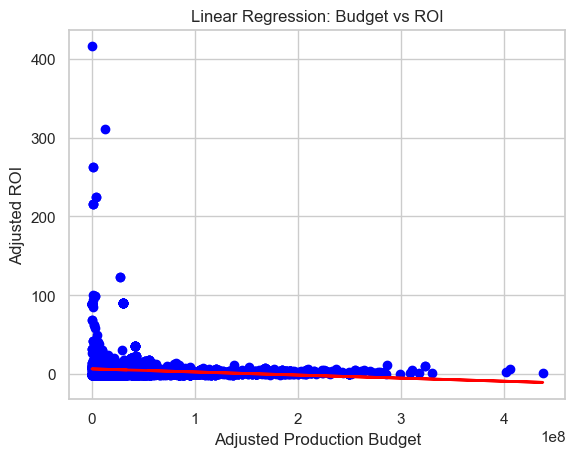

In [186]:
# Select the independent (X) and dependent (y) variables
X = df_clean_movies[['adjusted_production_budget']].dropna().values.reshape(-1, 1)
y = df_clean_movies['adjusted_ROI'].dropna().values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

# Predict values using the model
y_pred = model.predict(X)

# Plot the regression line and data points
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Adjusted Production Budget')
plt.ylabel('Adjusted ROI')
plt.title('Linear Regression: Budget vs ROI')
plt.grid(True)
plt.show()